<a href="https://colab.research.google.com/github/Nat1490/4GeeksAcademy/blob/master/explore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explore here

In [2]:
import pandas as pd
import numpy as np
import urllib.request

import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import seaborn as sns

import statistics as stats
from statsmodels.tsa.stattools import adfuller
from scipy import stats

In [ ]:
# Cargamos el Dataset y lo guardamos en raw para poderlo leer:

from ssl import _create_unverified_context
import ssl

url = "https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv"

ssl_context = urllib.request.urlopen(url, context=ssl._create_unverified_context())
df= pd.read_csv(ssl_context, index_col=None, delimiter=",")

df.to_csv("/Users/nataliagarciavila/Desktop/4 GEEKS ACADEMY/CLASES_EJERCICIOS_/CLASES_EJERCICIOS_/EJERCICIOS/CLASE 26- EJERCICIOS/machine-learning-python-template/data/raw/data.csv")

df.head()

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633


In [ ]:
df.shape

(366, 2)

1. PREDICCIÓN DE LA SERIE TEMPORAL

In [ ]:
#Transformamos la cadena de echa a objeto

total_data = df

total_data["date"] = pd.to_datetime(total_data.date)
total_data = total_data.set_index("date")
ts_total = total_data["sales"]
ts_total.head()

date
2022-09-03 17:10:08.079328    55.292157
2022-09-04 17:10:08.079328    53.803211
2022-09-05 17:10:08.079328    58.141693
2022-09-06 17:10:08.079328    64.530899
2022-09-07 17:10:08.079328    66.013633
Name: sales, dtype: float64

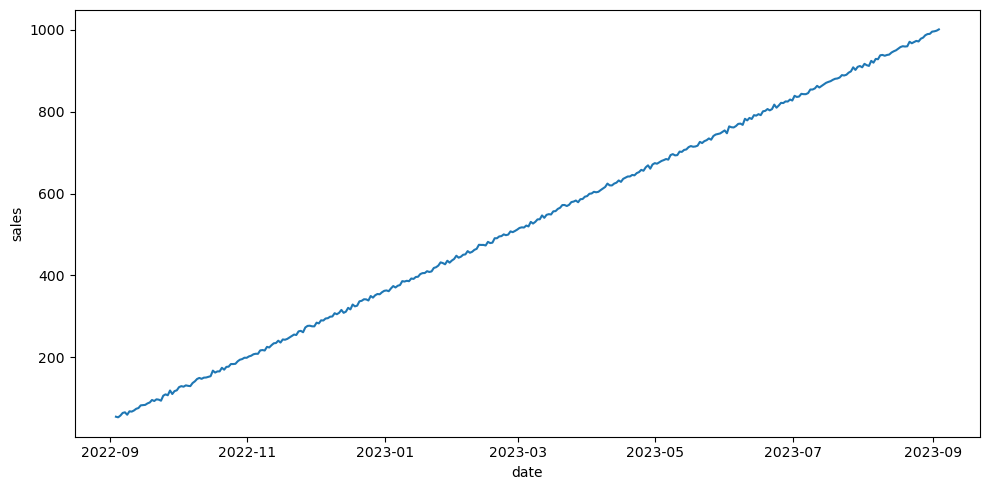

In [ ]:
#Trazamos la serie temporal

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts_total)

plt.tight_layout()

plt.show()

2. CONSTRUIMOS Y ANALIZAMOS LA SERIE TEMPORAL

In [18]:
from statsmodels.tsa.stattools import adfuller

def ts_total(total_data):

  data = {'date': pd.date_range(start='2022-09-01', periods=5, freq='D'),'sales': [55.292157, 53.803211, 58.141693, 64.530899, 66.013633]}
  total_data = pd.DataFrame(data)
  total_data['date'] = pd.to_datetime(total_data['date'])
  total_data = total_data.set_index('date')
  ts_total = total_data['sales']

def test_stationarity(timeseries):

    print("Dickey-Fuller test results:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])

    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(ts_total)

Dickey-Fuller test results:


TypeError: float() argument must be a string or a real number, not 'function'